<a href="https://colab.research.google.com/github/riteshkantule/Time_Series_Analysis_repo/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (22695, 2)
Missing values:
 timestamp       0
value        1285
dtype: int64
Statistics:
               value
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


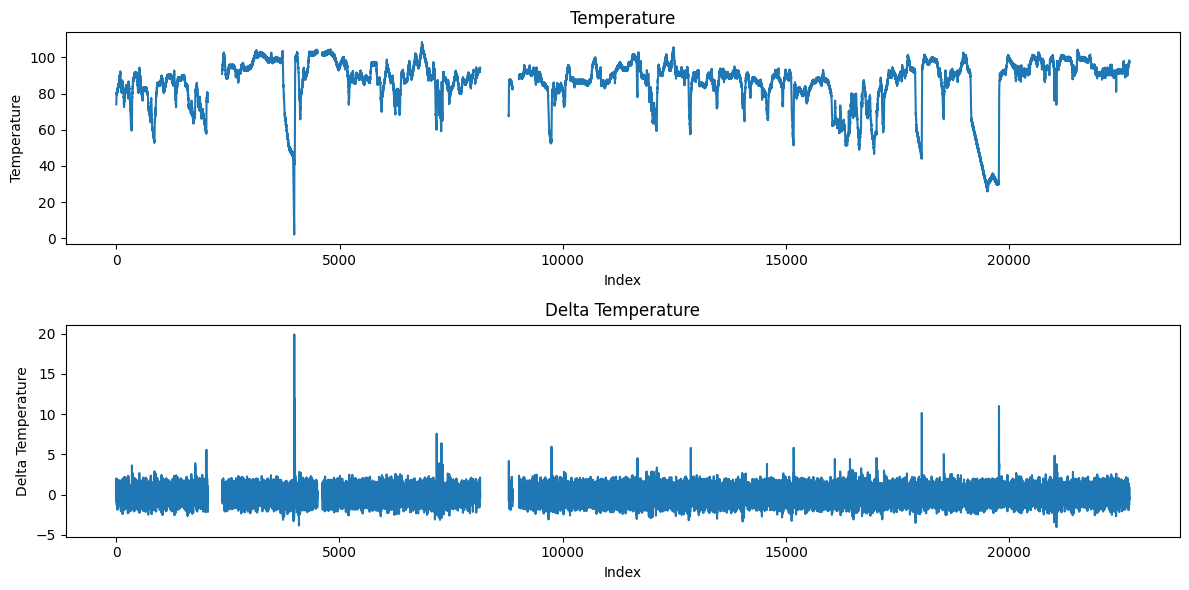

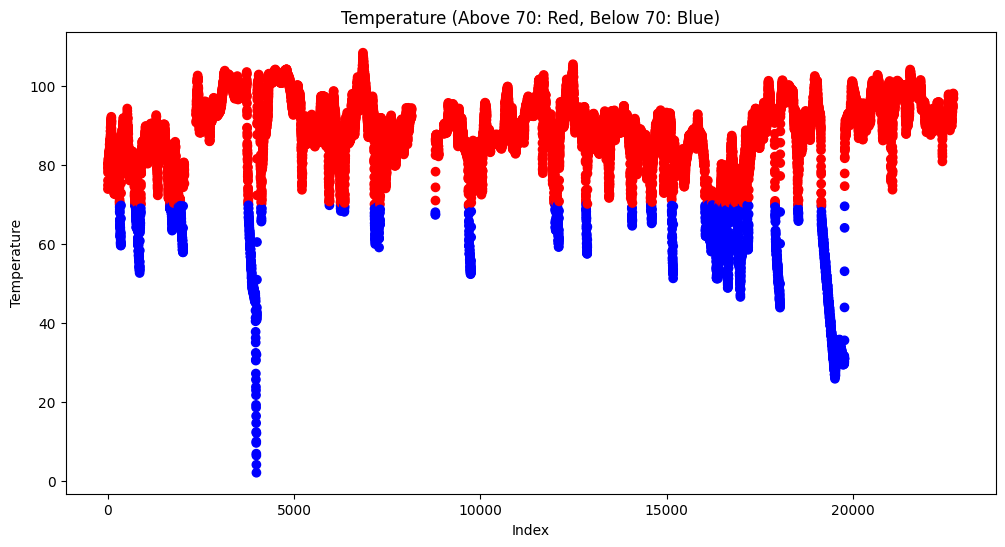

Dataset shape: (22695, 2)
Missing values:
 timestamp       0
value        1285
dtype: int64
Statistics:
               value
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


KeyError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from scipy import stats

# Task 1
def read_datasets():
    data_path = Path('machine_temp_failure_missing.csv')
    df = pd.read_csv(data_path)
    print("Dataset shape:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    print("Statistics:\n", df.describe())
    df.rename(columns={'value': 'temperature'}, inplace=True)
    return df

# Task 2
def add_delta_temperature(df):
    df['delta_temperature'] = df['temperature'].diff()
    return df

# Task 3
def plot_dfs(df):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['temperature'])
    plt.title('Temperature')
    plt.xlabel('Index')
    plt.ylabel('Temperature')

    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['delta_temperature'])
    plt.title('Delta Temperature')
    plt.xlabel('Index')
    plt.ylabel('Delta Temperature')

    plt.tight_layout()
    plt.show()

# Task 4
def plot_temperature_color(df):
    plt.figure(figsize=(12, 6))
    plt.scatter(df.index, df['temperature'], c=np.where(df['temperature'] > 70, 'red', 'blue'))
    plt.title('Temperature (Above 70: Red, Below 70: Blue)')
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.show()

# Task 5
def rmse_score(df_missing, df_original):
    rmse = np.sqrt(mean_squared_error(df_missing['temperature'], df_original['temperature']))
    print("RMSE Score:", rmse)

# Task 6
def imputation_methods(df):
    imputation_df = df.copy()
    methods = ['mean', 'ffill', 'bfill', 'interpolation']
    for method in methods:
        if method == 'mean':
            imputation_df['imputed_temperature'] = imputation_df['temperature'].fillna(imputation_df['temperature'].mean())
        elif method == 'ffill':
            imputation_df['imputed_temperature'] = imputation_df['temperature'].fillna(method='ffill')
        elif method == 'bfill':
            imputation_df['imputed_temperature'] = imputation_df['temperature'].fillna(method='bfill')
        elif method == 'interpolation':
            imputation_df['imputed_temperature'] = imputation_df['temperature'].interpolate()
        rmse_score(imputation_df, original_df)
    return imputation_df

# Task 7
def resample_hourly(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.set_index('timestamp')
    df_hourly = df.resample('H').mean().interpolate()
    return df_hourly

# Task 8
def iqr_outliers(df):
    q1 = df['temperature'].quantile(0.25)
    q3 = df['temperature'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]
    return outliers

def z_score(df):
    z_scores = np.abs(stats.zscore(df['temperature']))
    return z_scores

def plot_box_plot(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='temperature')
    plt.title('Box Plot - Temperature')
    plt.xlabel('Temperature')
    plt.show()

def plot_boxen_plot(df):
    plt.figure(figsize=(8, 6))
    sns.boxenplot(data=df, x='temperature')
    plt.title('Boxen Plot - Temperature')
    plt.xlabel('Temperature')
    plt.show()

def plot_lag_plot(df):
    plt.figure(figsize=(8, 6))
    pd.plotting.lag_plot(df['temperature'], lag=1)
    plt.title('Lag Plot - Temperature')
    plt.xlabel('Temperature (t)')
    plt.ylabel('Temperature (t+1)')
    plt.show()

def iqr_outliers(df):
    q1 = df['temperature'].quantile(0.25)
    q3 = df['temperature'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]
    return outliers

def z_score_outliers(df):
    z_scores = z_score(df)
    threshold = 3  # Define threshold for z-score outliers
    outliers = df[np.abs(z_scores) > threshold]
    return outliers

# Task 1
df_missing = read_datasets()

# Task 2
df_missing = add_delta_temperature(df_missing)

# Task 3
plot_dfs(df_missing)

# Task 4
plot_temperature_color(df_missing)

# Task 5
df_missing = read_datasets()
df_original = pd.read_csv('machine_temp_failure_original.csv')

# Task 6
imputed_df = imputation_methods(df_missing)

# Task 7
df_hourly = resample_hourly(imputed_df)

# Task 8
plot_box_plot(df_hourly)
plot_boxen_plot(df_hourly)
plot_lag_plot(df_hourly)

outliers_iqr = iqr_outliers(df_hourly)
outliers_z_score = z_score_outliers(df_hourly)

print("IQR Outliers:")
print(outliers_iqr)
print("\nZ-Score Outliers:")
print(outliers_z_score)
